In [8]:
import pandas as pd
import os


ticker_path = './ticker.csv'


In [9]:
import re
def remove_link(text):
    text = re.sub(r"http\S+", "", text)
    return text

In [10]:
tt = {'ticker':[], '#tweets':[]}
f = []
data = pd.read_csv('final_News_Data.csv')

In [16]:
data = data.rename(columns = {'release_date': 'date'})

In [59]:
len(data['title'])

178022

In [18]:
data.keys()

Index(['Unnamed: 0', 'ticker', 'title', 'category', 'content', 'date',
       'provider'],
      dtype='object')

In [19]:
data.describe()

,Unnamed: 0
count,178022.000000
mean,118291.279538
std,61469.282609
min,1300.000000
25%,65258.250000
50%,118392.500000
75%,174635.750000
max,221512.000000


<AxesSubplot:>

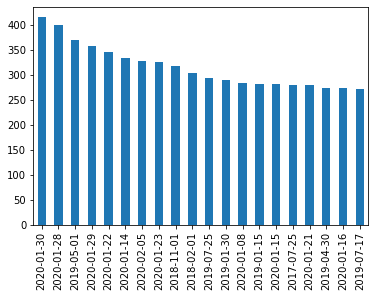

In [20]:
ts = pd.Series(data['date'].values, index = data['date'])
data['date'].value_counts().sort_values()
tr = data['date'].value_counts()
tr.head(20).plot.bar()

<AxesSubplot:>

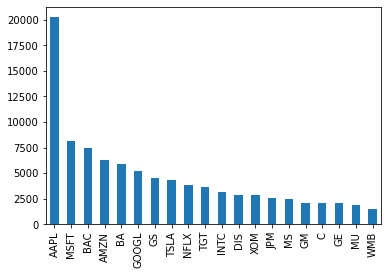

In [22]:
ts = data['ticker'].value_counts()
ts.head(20).plot.bar()

In [57]:
ts = data['provider'].value_counts()
ts.head(20)

Zacks Investment Research       68882
Reuters                         49875
Investing.com                   13459
Seeking Alpha                   10072
Bloomberg                        3300
The Motley Fool                  1130
Estimize                          845
International Business Times      809
Gregory W. Harmon                 796
Nicholas Santiago                 751
Ryan Mallory                      714
Dr. Duru                          634
Cointelegraph                     628
CNBC                              604
iFOREX                            586
Tim Knight                        550
Cryptovest                        505
Pinchas Cohen/Investing.com       486
Marvin Clark                      472
LFB Forex                         463
Name: provider, dtype: int64

In [28]:
import nltk
import re

VOCAB_PATH = "./../Twint"

if os.path.exists(
    os.path.join(VOCAB_PATH, "LoughranMcDonald_MasterDictionary_2018.csv")
):
    loughran_mcdonald = pd.read_csv(
        os.path.join(VOCAB_PATH, "LoughranMcDonald_MasterDictionary_2018.csv")
    )
    loughran_mcdonald_sentiment = pd.read_excel(
        os.path.join(VOCAB_PATH, "LoughranMcDonald_SentimentWordLists_2018.xlsx"),
        sheet_name=None,
        header=None,
    )
else:
    VOCAB_PATH = "./../Twit"
    loughran_mcdonald = pd.read_csv(
        os.path.join(VOCAB_PATH, "LoughranMcDonald_MasterDictionary_2018.csv")
    )
    loughran_mcdonald_sentiment = pd.read_excel(
        os.path.join(VOCAB_PATH, "LoughranMcDonald_SentimentWordLists_2018.xlsx"),
        sheet_name=None,
        header=None,
    )

sentiment_dict = {
    x.lower(): set(loughran_mcdonald_sentiment[x][0].str.lower())
    for x in [
        "Negative",
        "Positive",
        "Uncertainty",
        "Litigious",
        "StrongModal",
        "WeakModal",
        "Constraining",
    ]
}
vocab = set(loughran_mcdonald["Word"].str.lower())

dollar_pattern = re.compile(r"\$\d+(?:,\d+)?(?:\.\d+)?")
percent_pattern = re.compile(r"\d+(?:,\d+)?(?:\.\d+)?%")
all_num_pattern = re.compile(r"\$?\d+(?:,\d+)?(?:\.\d+)?%?(?!-\w+)(?!\w+)")
form_pattern = re.compile(r"\d+\w+-\d+|\d+-[A-Za-z]")


stop_word_list = ['i', 'me', 'my', 'myself', 'we', 'our', 'ours', 'ourselves', 'you', "you're",
 "you've", "you'll", "you'd", 'your', 'yours', 'yourself', 'yourselves', 'he', 'him', 'his', 'himself',
 'she', "she's", 'her', 'hers', 'herself', 'it', "it's", 'its', 'itself', 'they', 'them', 'their',
 'theirs', 'themselves', 'what', 'which', 'who', 'whom', 'this', 'that', "that'll", 'these', 'those',
 'am', 'is', 'are', 'was', 'were', 'be', 'been', 'being', 'have', 'has', 'had', 'having', 'do', 'does',
 'did', 'doing', 'a', 'an', 'the', 'and', 'but', 'if', 'or', 'because', 'as', 'until', 'while', 'of',
 'at', 'by', 'for', 'with', 'about', 'against', 'between', 'into', 'through', 'during', 'before',
 'after', 'above', 'below', 'to', 'from', 'up', 'down', 'in', 'out', 'on', 'off', 'over', 'under',
 'again', 'further', 'then', 'once', 'here', 'there', 'when', 'where', 'why', 'how', 'all', 'any',
 'both', 'each', 'few', 'more', 'most', 'other', 'some', 'such', 'no', 'nor', 'not', 'only', 'own',
 'same', 'so', 'than', 'too', 'very', 's', 't', 'can', 'will', 'just', 'don', "don't", 'should',
 "should've", 'now', 'd', 'll', 'm', 'o', 're', 've', 'y', 'ain', 'aren', "aren't", 'couldn',
 "couldn't", 'didn', "didn't", 'doesn', "doesn't", 'hadn', "hadn't", 'hasn', "hasn't", 'haven',
 "haven't", 'isn', "isn't", 'ma', 'mightn', "mightn't", 'mustn', "mustn't", 'needn', "needn't",
 'shan', "shan't", 'shouldn', "shouldn't", 'wasn', "wasn't", 'weren', "weren't", 'won', "won't",
 'wouldn', "wouldn't"]
STOPWORDS = set(stop_word_list)

def compute_score(sent):
    sent_lower = sent.lower()
    tokens = [x for x in _tokenize(sent_lower) if x not in STOPWORDS]
    pos, valid, neg = 0, 0, 0

    for tok in tokens:
        if tok in vocab:
            valid += 1
        if tok in sentiment_dict["positive"]:
            pos += 1
        if tok in sentiment_dict["negative"]:
            neg += 1

    return valid, pos, neg

def _tokenize(sent):
    if re.search(r"turn the call .*? to", sent) is not None:
        return ""
    pattern = r"""(?x)
        (?:[A-Z]\.)+
      | \$?\d+(?:\.\d+)?%?
      | \d+(?:\.\d+)?
      | \w+(?:-\w+)*
      | \.\.\.
      | \'s
    """
    return nltk.regexp_tokenize(sent, pattern)

def tokenize(sent):
    return " . ".join([" ".join(_tokenize(prune_sentence(x))) for x in sent.split("|")])

def prune_sentence(sent):
    s = re.sub(r"Thank.*?[\.!?]", "", sent)
    s = re.sub(r"Welcome.*?[\.!?]", "", s)
    s = re.sub(r"Good (morning|afternoon|evening).*?[\.!?]", "", s, flags=re.IGNORECASE)
    #     s = re.sub(r'[A-Z].?turn the call (?:back|over) to.?[\.!?]', '', s)
    s = re.sub(r"\([^)]*\)", "", s).strip()
    return s

In [29]:
s_tweet = list(data['content'][:10])

In [30]:
print(s_tweet)

['In the past five trading days  telecom stocks scripted a remarkable turnaround and witnessed an upward trajectory  courtesy the last minute  Phase One  trade deal between the United States and China  Although the two sides are yet to sign the agreement  which is likely to take place in January 2020   the partial trade accord represents a major breakthrough in the 21 month standoff between the world s two largest economies  The trade truce buoyed investor sentiments and propelled the industry to mirror broader equity market performance Per the agreement  the Trump administration has called off a 15  tariff on nearly  160 billion worth of imports from China  including toys  smartphones  laptops and other electronics items  In addition  the U S  government will halve its 15  levy on  120 billion worth of Chinese import basket  leaving the tariff regime limited to 25  taxes on  250 billion and 7 5  on  120 billion  In response  the communist nation has suspended the planned addition of 1

In [31]:
for i in s_tweet:
    score = compute_score(prune_sentence(i))
    print(i, score)

In the past five trading days  telecom stocks scripted a remarkable turnaround and witnessed an upward trajectory  courtesy the last minute  Phase One  trade deal between the United States and China  Although the two sides are yet to sign the agreement  which is likely to take place in January 2020   the partial trade accord represents a major breakthrough in the 21 month standoff between the world s two largest economies  The trade truce buoyed investor sentiments and propelled the industry to mirror broader equity market performance Per the agreement  the Trump administration has called off a 15  tariff on nearly  160 billion worth of imports from China  including toys  smartphones  laptops and other electronics items  In addition  the U S  government will halve its 15  levy on  120 billion worth of Chinese import basket  leaving the tariff regime limited to 25  taxes on  250 billion and 7 5  on  120 billion  In response  the communist nation has suspended the planned addition of 10 

In [49]:
#Space for cal pos/neg features
data['t_lm_val'] = 0
data['t_lm_pos'] = 0
data['t_lm_neg'] = 0
data['c_lm_val'] = 0
data['c_lm_pos'] = 0
data['c_lm_neg'] = 0

In [50]:
for i, tweet in enumerate(data['title']):
    tweet = remove_link(prune_sentence(tweet))
    score = compute_score(tweet)
    data.at[i, 't_lm_val'] = score[0]
    data.at[i, 't_lm_pos'] = score[1]
    data.at[i, 't_lm_neg'] = score[2]
    #print(score)
    #print(data.loc[[0]])
    #break

In [55]:
for i, tweet in enumerate(data['content']):
    score = (0, 0, 0)
    try:
        tweet = remove_link(prune_sentence(tweet))
        score = compute_score(tweet)
    except:
        continue
    data.at[i, 'c_lm_val'] = score[0]
    data.at[i, 'c_lm_pos'] = score[1]
    data.at[i, 'c_lm_neg'] = score[2]
    #print(score)
    #print(data.loc[[0]])
    #break

In [56]:
data.head()

,Unnamed: 0,ticker,title,category,content,date,provider,t_lm_val,t_lm_pos,t_lm_neg,c_lm_val,c_lm_pos,c_lm_neg
0,1300,CTL,Telecom Stock Roundup AT T s Financial Update...,opinion,In the past five trading days telecom stocks ...,2019-12-18,Zacks Investment Research,6,0,0,615,21,9
1,1301,CTL,CenturyLink s Solution To Drive Braskem s Netw...,opinion,CenturyLink Inc NYSE CTL recently commun...,2019-12-18,Zacks Investment Research,4,0,0,313,16,2
2,1302,INTC,Intel INTC To Post Q4 Earnings DCG CCG In...,opinion,Intel NASDAQ INTC is scheduled to report f...,2020-01-20,Zacks Investment Research,3,0,0,292,8,7
3,1303,INTC,Stocks Jump About 2 This Week On Trade Deals ...,opinion,The major indices just finished another positi...,2020-01-20,Zacks Investment Research,6,0,0,369,18,5
4,1304,INTC,Apple Partner Pegatron Plans New Facilities In...,opinion,Apple s NASDAQ AAPL assembly partner Pega...,2020-01-20,Zacks Investment Research,5,0,0,275,3,5


In [44]:
mga = data[data['ticker'] == 'GOOGL']

In [45]:
mga = mga[(mga['date'] > '2017-11-14') & (mga['date'] <'2017-11-30')]

In [46]:
for row in mga['content']:
    print(row)

Shopify Inc    NYSE SHOP   recently announced that its worldwide merchant base of over 500 000 sold more than  1 billion worth of gross merchandise volume  GMV  during the Black Friday and Cyber Monday  BFCM  weekend  Merchants also generated above  1 million transactions in a minute during the peak hour As a result  management was extremely positive about the strong response received by the small business owners and entrepreneurs who list their products on their portal  especially during a time which has always been under the dominance of prominent retailers Shopify noted that UK  Spain and South Africa were the top international sellers  Currently  the sales figure was the highest in the United States  California  New York and Texas  Mobile sales accounted for around 64  of the total figure  which had 10  year over year increase  In terms of sales volume  apparels  accessories and house wares were the leading product lines Recent Upgrades of the PlatformPrior to the BFCM weekend  Sho

In [47]:
from wordcloud import WordCloud, STOPWORDS
import matplotlib.pyplot as plt
import pandas as pd

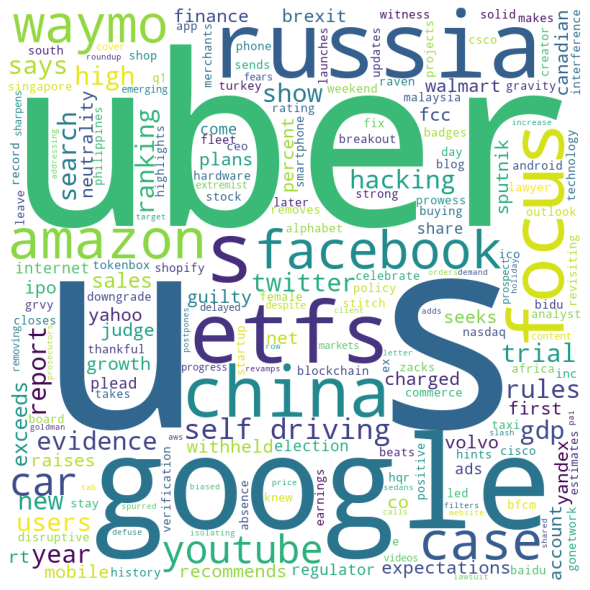

In [48]:
stopwords = set(STOPWORDS)
stopwords.add('TSLA')
comment_words = ''

for val in mga['title']:
    val = remove_link(val)
    #print(val)
    # typecaste each val to string
    val = str(val)
  
    # split the value
    tokens = val.split()
      
    # Converts each token into lowercase
    for i in range(len(tokens)):
        tokens[i] = tokens[i].lower()
      
    comment_words += " ".join(tokens)+" "

    
wordcloud = WordCloud(width = 800, height = 800,
                background_color ='white',
                stopwords = stopwords,
                min_font_size = 10).generate(comment_words)
  
# plot the WordCloud image                       
plt.figure(figsize = (8, 8), facecolor = None)
plt.imshow(wordcloud)
plt.axis("off")
plt.tight_layout(pad = 0)
plt.show()